# Logistic Regression

In [1]:
#################################creating x 
def variables ():

    x = np.zeros([20,2])
    a = [(np.exp(1))*np.sin(x+1) for x in range(20)]
    b = [(np.exp(0.5))*np.cos(x+1) for x in range(20)]
    x[:,0]=a
    x[:,1]=b

    ###############################creating y
    y = np.zeros([20,1])
    a = np.array([np.sin(1+ x[:,0])])
    for i in range(len(y)):
        if a[:,i]> 0:
            y[i]=1
        else:
            y[i]=0

    theta = np.array([[0.25], [0.5], [-0.5]])
    
    return (x,y,theta)

# Sigmoid

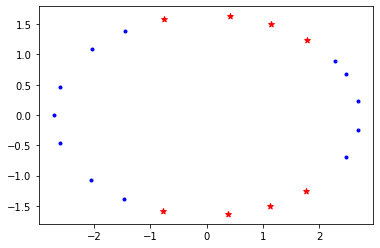

In [2]:
import numpy as np
import random
from matplotlib import pyplot as plt


def theta_cero(x):
    m = len(x) #the number of values
    one = np.ones([m,1]) 
    x = np.concatenate((one,x),axis=1) #puts a column of ones in x
    return x
    
def sigmoid(x,theta):
    x = theta_cero(x)
    
    z = x@theta #z => theta.T * X
    g = 1 / (1+ np.exp(-z)) #the function on the sigmoid
    return g

x, y, theta = variables()
sigmoid1 = sigmoid(x,theta)

#the graph, if its 1 or cero 
for i in range(len(y)):
    if y[i] == 1:
         plt.scatter(x[i,0],x[i,1], marker='*', color='red')
    else:
        plt.scatter(x[i,0],x[i,1], marker='.', color='blue')
 

# Predict

In [3]:
def prediction (x, theta):    
    p = sigmoid(x,theta)
    
    for i in range (len(x)):
        if p[i] >= 0.5:
            p[i] = 1;
        else:
            p[i] = 0;
    
    return p 
     
x, y, theta = variables()
prediction(x, theta)    

array([[1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.]])

# Cost Function 

1)  -log (h(x)) if y = 1

2)  -log (1-h(x))if y = 0

Cost(h(x),y) = -y * log(h(x)) - (1-y) * log(1-h(x))

if y = 1 => Cost = 1)

if y = 0 => Cost = 2)

array([[ 0.25],
       [ 0.5 ],
       [-0.5 ]])

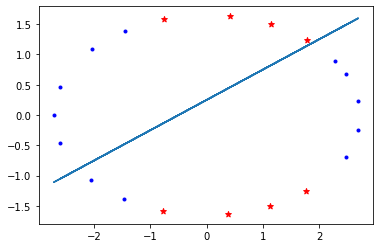

In [4]:
from matplotlib import pyplot as plt
import numpy as np 
import random

x, y, theta = variables()
m = len(y)

iterations = 35
alpha = 1
Lambda = 0.1

def Cost_Function(x,y,theta,alpha,m):
    #theta_cero(x) => is x with the extra column with ones 
    h = sigmoid (x,theta) #mandamos a la funcion sigmoid todo 
    J = (-alpha/m) * sum((y*np.log(h) + (1-y)*np.log(1-h))) # obtenermos la funcion de costo 

    grad = (1/m) * theta_cero(x).T @ (h-y)
    
    return (J, grad)


def Cost_Function_Reg(x,y,theta,alpha,Lambda,m): #the cost function with the regularization 
    #theta_cero(x) => is x with the extra column with ones 
    h = sigmoid (x,theta) #mandamos a la funcion sigmoid todo 
    J = (-alpha/m) * sum((y*np.log(h) + (1-y)*np.log(1-h))) + (Lambda/(2*m))*sum(theta[1:]**2)  # obtenermos la funcion de costo 
    
    #the first value of the grad its the same 
    grad = np.zeros([len(theta),1])
    grad[0] = (1/m) * (theta_cero(x)[:,1]).T @ (h-y)
    #the other values you need to be affected by lambda
    grad[1:] = (1/m) * (theta_cero(x)[:,1:]).T @ (h-y) + (Lambda/m)*(theta[1:])    
    
    return (J, grad)


#plot the pints of the dataset without reguralization 
for i in range(len(y)):
    if y[i] == 1:
         plt.scatter(x[i,0],x[i,1], marker='*', color='red')
    else:
        plt.scatter(x[i,0],x[i,1], marker='.', color='blue')

#plot the desicion boundery 
plt.plot(x[:,0], theta[0] + x[:,0]*theta[1])
#plt.plot(x[:,1], theta[0] + x[:,1]*theta[2])
theta

# Plotting 

array([[-0.45368382],
       [ 0.22764416],
       [-0.07696324]])

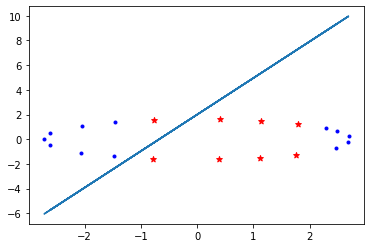

In [62]:
################Ploting withoun reg
#variables
x, y, theta = variables()
m = len(y)
iterations = 35
alpha = 1

iterations = 50

for i in range(iterations):
    #calling the function
    J, grad = Cost_Function(x,y,theta,alpha,m)
    theta = theta - grad #the value of theta after all iterations
    

#plot the pints of the dataset without reguralization 
for i in range(len(y)):
    if y[i] == 1:
         plt.scatter(x[i,0],x[i,1], marker='*', color='red')
    else:
        plt.scatter(x[i,0],x[i,1], marker='.', color='blue')

#plot the desicion boundery 
plt.plot(x[:,0], -theta[0]/theta[1] + x[:,0]*(-theta[1]/theta[2]))
#plt.plot(x[:,1], theta[0] + x[:,1]*theta[2])
theta

array([[ 0.00212737],
       [ 0.19985566],
       [-0.08504945]])

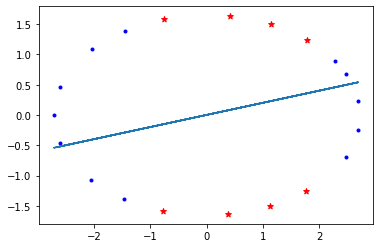

In [6]:
##########################Ploting with reg
#variables
x, y, theta = variables()
m = len(y)
iterations = 35
alpha = 1
Lambda = 0.1

iterations = 50

for i in range(iterations):
    #calling the function
    J, grad = Cost_Function_Reg(x,y,theta,alpha,Lambda,m) #the cost function with the regularization 
    theta = theta - grad #the value of theta after all iterations
    

#plot the pints of the dataset without reguralization 
for i in range(len(y)):
    if y[i] == 1:
         plt.scatter(x[i,0],x[i,1], marker='*', color='red')
    else:
        plt.scatter(x[i,0],x[i,1], marker='.', color='blue')

#plot the desicion boundery 
plt.plot(x[:,0], theta[0] + x[:,0]*theta[1])
#plt.plot(x[:,1], theta[0] + x[:,1]*theta[2])
theta

In [7]:
w = theta[1:]
b = theta[0]
m = len(y)
alpha = 1
iterations = 35

for i in range (iterations):

    z = x@w + b 
    A = 1 / (1+ np.exp(-z))

    dz = A-y
    dw = 1/m*x.T@dz
    db = 1/m * np.sum(dz)

    w = w - alpha*dw
    b = b - alpha*db

print(w,b)

[[ 0.22763688]
 [-0.07696557]] [-0.45361856]


[[-0.21720691]
 [-1.07534387]] [-0.14451726]


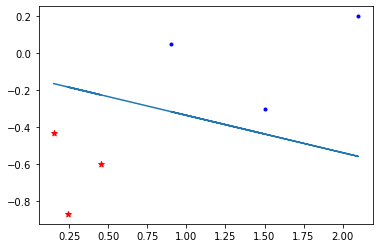

In [63]:
theta = np.array([[0.2], [0.7], [-0.9]])

x = np.array([[1.5, 0.9, 2.1, 0.24, 0.45, 0.15],[-0.3, 0.05, 0.2, -0.87, -0.6, -0.43]])
x = x.T 
y = np.array([0, 0, 0, 1, 1, 1])
y = y.reshape(6,1)

for i in range(len(y)):
    if y[i] == 1:
         plt.scatter(x[i,0],x[i,1], marker='*', color='red')
    else:
        plt.scatter(x[i,0],x[i,1], marker='.', color='blue')
        
        
w = theta[1:]
b = theta[0]
m = len(y)
alpha = 1
iterations = 2

for i in range (iterations):

    z = x@w + b 
    A = 1 / (1+ np.exp(-z))

    dz = A-y
    dw = 1/m*x.T@dz
    db = 1/m * np.sum(dz)

    w = w - alpha*dw
    b = b - alpha*db

print(w,b)

plt.plot(x[:,0], -b/w[1] + x[:,0]*(-w[0]/w[1]))